In [2]:
# https://github.com/derekbanas/matplotlib/blob/master/MPL%20Tut.ipynb

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
%reload_ext autoreload
%autoreload 2


# Functional plot

Text(0, 0.5, 'Days Squered')

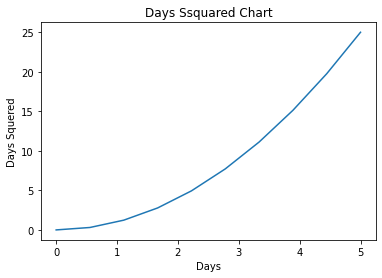

In [6]:
x_1 = np.linspace(0,5,10)
y_1 = x_1 **2
plt.plot(x_1,y_1)
plt.title('Days Ssquared Chart')
plt.xlabel('Days')
plt.ylabel('Days Squered')
# plt.show()  # Outside of jupyter notebooks

# Multiple plots

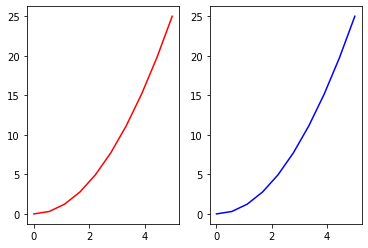

In [13]:
plt.subplot(1,2,1)
plt.plot(x_1,y_1,'r')
plt.subplot(1,2,2)
plt.plot(x_1,y_1,'b')


# Using Figure Objects

Text(0, 40, 'Simple msg')

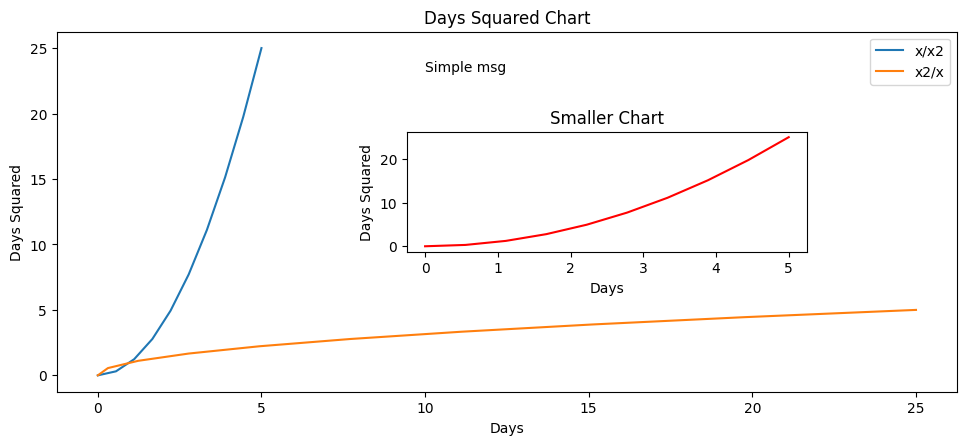

In [38]:
fig_1 = plt.figure(figsize=(10,4), dpi=100)

# [left, bottom, width, height]
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
axes_1.set_xlabel('Days')
axes_1.set_ylabel('Days Squared')
axes_1.set_title('Days Squared Chart')
axes_1.plot(x_1,y_1,label='x/x2')
axes_1.plot(y_1,x_1,label='x2/x')
# Legend placement
#best fit:0, upper right:1, upper left:2, lower left:3, lower right:4
# (x,y) from lower left (0.5,0.2)
axes_1.legend(loc=0)

# [left, bottom, width, height]
axes_2 = fig_1.add_axes([0.45,0.45,0.4,0.3])
axes_2.set_xlabel('Days')
axes_2.set_ylabel('Days Squared')
axes_2.set_title('Smaller Chart')
axes_2.plot(x_1,y_1,'r')

# Add a text message based on center at (0,0)
axes_2.text(0,40,'Simple msg')

# SubPlots

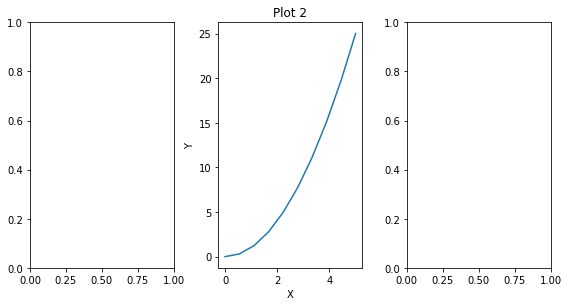

In [41]:
# Subplots with different plots over 1 row (1 row X 3 cols)
# Index in the axes_2[1] accesses the second column plot
fig_2, axes_2 = plt.subplots(figsize=(8,4), nrows=1, ncols=3)
plt.tight_layout()
axes_2[1].set_title('Plot 2')
axes_2[1].set_xlabel('X')
axes_2[1].set_ylabel('Y')
axes_2[1].plot(x_1,y_1)                  


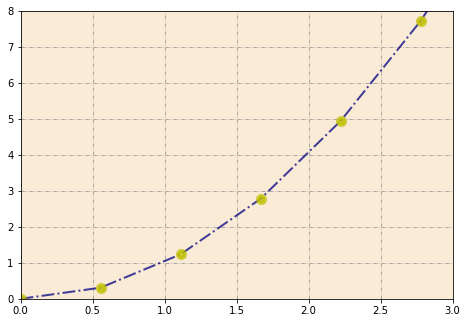

In [45]:
fig_3 = plt.figure(figsize=(6,4))
axes_3 = fig_3.add_axes([0,0,1,1])
axes_3.plot(x_1,y_1, color='navy', alpha=.75, lw=2, ls='-.', marker='o', markersize=7, markerfacecolor='y',
           markeredgecolor='y', markeredgewidth=4)
# Set the lower and upper bound of x & y axis
axes_3.set_xlim([0,3])
axes_3.set_ylim([0,8])

# Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
axes_3.grid(True, color='0.6', dashes=(5, 2, 1, 2))
# Set grid background color
axes_3.set_facecolor('#FAEBD7')


# Save visualization to a file

In [46]:
# You can save your plots to numerous file types : png, pdf, ps, eps, svg, pgf, 
fig_3.savefig('1st_plot.png')

# Pandas dataframe

<BarContainer object of 12 artists>

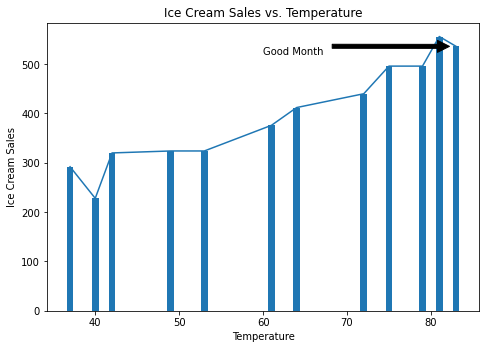

In [52]:
# Read in ice cream sales data
ics_df = pd.read_csv('icecream.csv')
ics_df = ics_df.sort_values(by='Temperature')

# Convert pandas to a numpy array
np_arr = ics_df.values

x_2 = np_arr[:,0]
y_2 = np_arr[:,1]

fig_4 = plt.figure(figsize=(6,4))
axes_4 = fig_4.add_axes([0,0,1,1])
axes_4.set_title('Ice Cream Sales vs. Temperature')
axes_4.set_xlabel('Temperature')
axes_4.set_ylabel('Ice Cream Sales')
axes_4.plot(x_2,y_2)

# Add Annotations by supplying the x & y to point at and the position of the text
# based off of lower left had corner being 0,0
axes_4.annotate('Good Month', xy=(83, 536), xytext=(60, 520),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add bars to the plot
plt.bar(x_2,y_2)

# TeX Markup

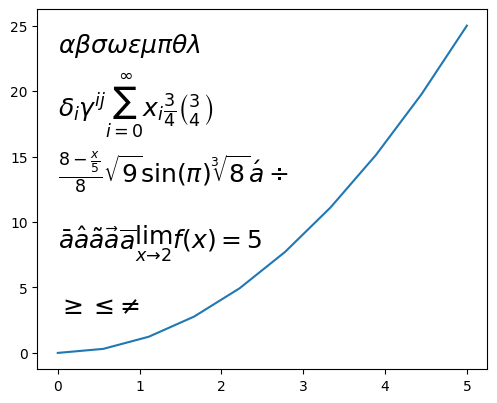

In [53]:
# You can use a subset of TeX markup by placing text between $
# matplotlib.org/tutorials/text/mathtext.html
fig_5 = plt.figure(figsize=(5,4),dpi=100)
axes_5 = fig_5.add_axes([0.1,0.1,0.9,0.9])

# All listed plus kappa, iota, zeta, nu, rho, eta, xi, omicron, gamma, tau, phi, 
# chi, psi, delta (Capitalize the first letter for uppercase)
axes_5.text(0, 23, 
            r'$\alpha \beta \sigma \omega \epsilon \mu \pi \theta \lambda$', fontsize=18)
# Subscripts, multiletter superscript, sum, fractions, binomial
axes_5.text(0, 18, 
            r'$\delta_i \gamma^{ij} \sum_{i=0}^\infty x_i \frac{3}{4} \binom{3}{4}$', 
            fontsize=18)
# Another fraction, sqrt, cbrt, trig functions : 
axes_5.text(0, 13, 
            r'$\frac{8 - \frac{x}{5}}{8} \sqrt{9} \sin(\pi) \sqrt[3]{8} \acute a \div$', 
            fontsize=18)
axes_5.text(0, 8, 
            r'$\bar a \hat a \tilde a \vec a \overline {a} \lim_{x \to 2} f(x) = 5$', 
            fontsize=18)
axes_5.text(0, 3, 
            r'$\geq \leq \ne$', 
            fontsize=18)
axes_5.plot(x_1,y_1)

# Timeseries

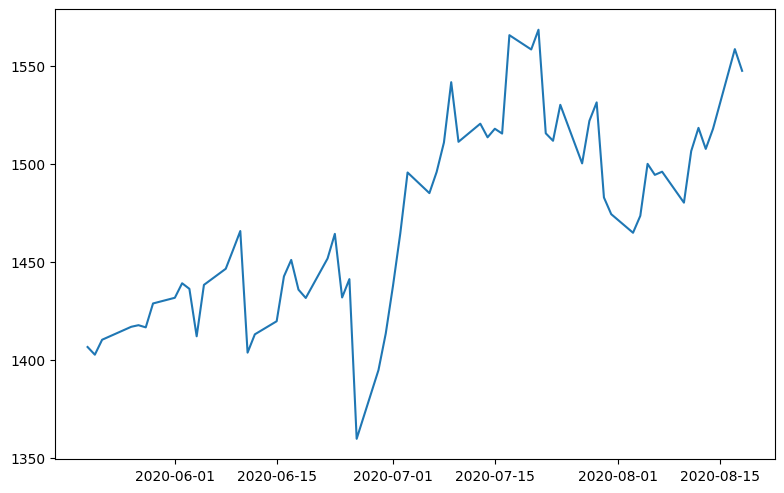

In [54]:
import datetime

# I'll show other ways of doing this when I cover Matplotlib Finance
# Get Yahoo GOOG csv file and convert to NumPy array
# https://finance.yahoo.com/quote/GOOG/history/
goog_data = pd.read_csv('GOOG.csv')
goog_data_np = goog_data.to_numpy()
# Get array of prices in 5th column
goog_cp = goog_data_np[:,4]
goog_cp

# Get NumPy array with just weekdays between dates excluding holidays
holidays = [datetime.datetime(2020,5,25), datetime.datetime(2020,8,19)]
date_arr = pd.bdate_range(start='5/20/2020', end='8/19/2020', 
                          freq='C',
                         holidays=holidays)
date_arr_np = date_arr.to_numpy()

fig_7 = plt.figure(figsize=(8,5),dpi=100)
axes_7 = fig_7.add_axes([0.1,0.1,0.9,0.9])
plt.plot(date_arr_np, goog_cp)

# Matplot Finance

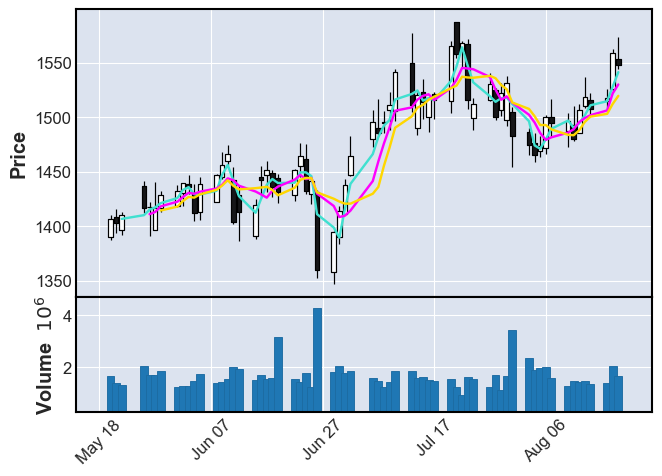

In [65]:
import mplfinance as mpf
goog_df = pd.read_csv('GOOG.csv', index_col=0, parse_dates=True)
goog_df.index.name = 'Date'
mpf.plot(goog_df, type='candle', mav=(3,5,7), volume=True, show_nontrading=True)


# Heatmaps

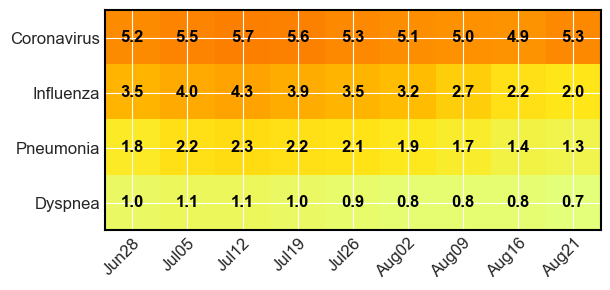

In [69]:
# A heatmap is a color coded representation of data from a 2D list
symptoms = ["Coronavirus","Influenza","Pneumonia","Dyspnea"]
dates = ["Jun28","Jul05","Jul12","Jul19","Jul26","Aug02","Aug09","Aug16","Aug21"]
symp_per = np.array([[5.2, 5.5, 5.7, 5.6, 5.3, 5.1, 5.0, 4.9, 5.3],
                    [3.5, 4.0, 4.3, 3.9, 3.5, 3.2, 2.7, 2.2, 2.0],
                    [1.8, 2.2, 2.3, 2.2, 2.1, 1.9, 1.7, 1.4, 1.3],
                    [1.0, 1.1, 1.1, 1.0, 0.9, 0.8, 0.8, 0.8, 0.7]])

fig_10, axes_10 = plt.subplots()
# Dfine data to use and color map
im = axes_10.imshow(symp_per, cmap="Wistia")

# Add ticks at data points and labels
axes_10.set_xticks(np.arange(len(dates)))
axes_10.set_yticks(np.arange(len(symptoms)))
axes_10.set_xticklabels(dates)
axes_10.set_yticklabels(symptoms)

# Rotate labels on the bottom so they don't overlap
plt.setp(axes_10.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(symptoms)):
    for j in range(len(dates)):
        text = axes_10.text(j, i, symp_per[i, j],
                       ha="center", va="center", color="k",fontweight="bold")